In [8]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Import “Cars prices” .csv file into your notebook and read it by Pandas python library.
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#Drop rows with NaN entries
df = df.dropna()

<AxesSubplot:>

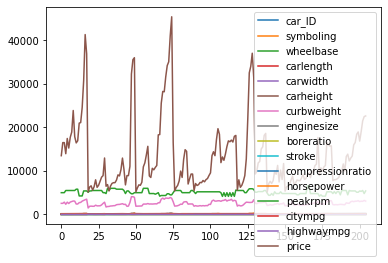

In [13]:
#Plot whole features with Pandas.DataFrame.plot function.
df.plot()
#df.plot(figsize=(15,10))# it would show it bigger

array([[<AxesSubplot:title={'center':'car_ID'}>,
        <AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'wheelbase'}>,
        <AxesSubplot:title={'center':'carlength'}>],
       [<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'carheight'}>,
        <AxesSubplot:title={'center':'curbweight'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'boreratio'}>,
        <AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compressionratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'peakrpm'}>,
        <AxesSubplot:title={'center':'citympg'}>,
        <AxesSubplot:title={'center':'highwaympg'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

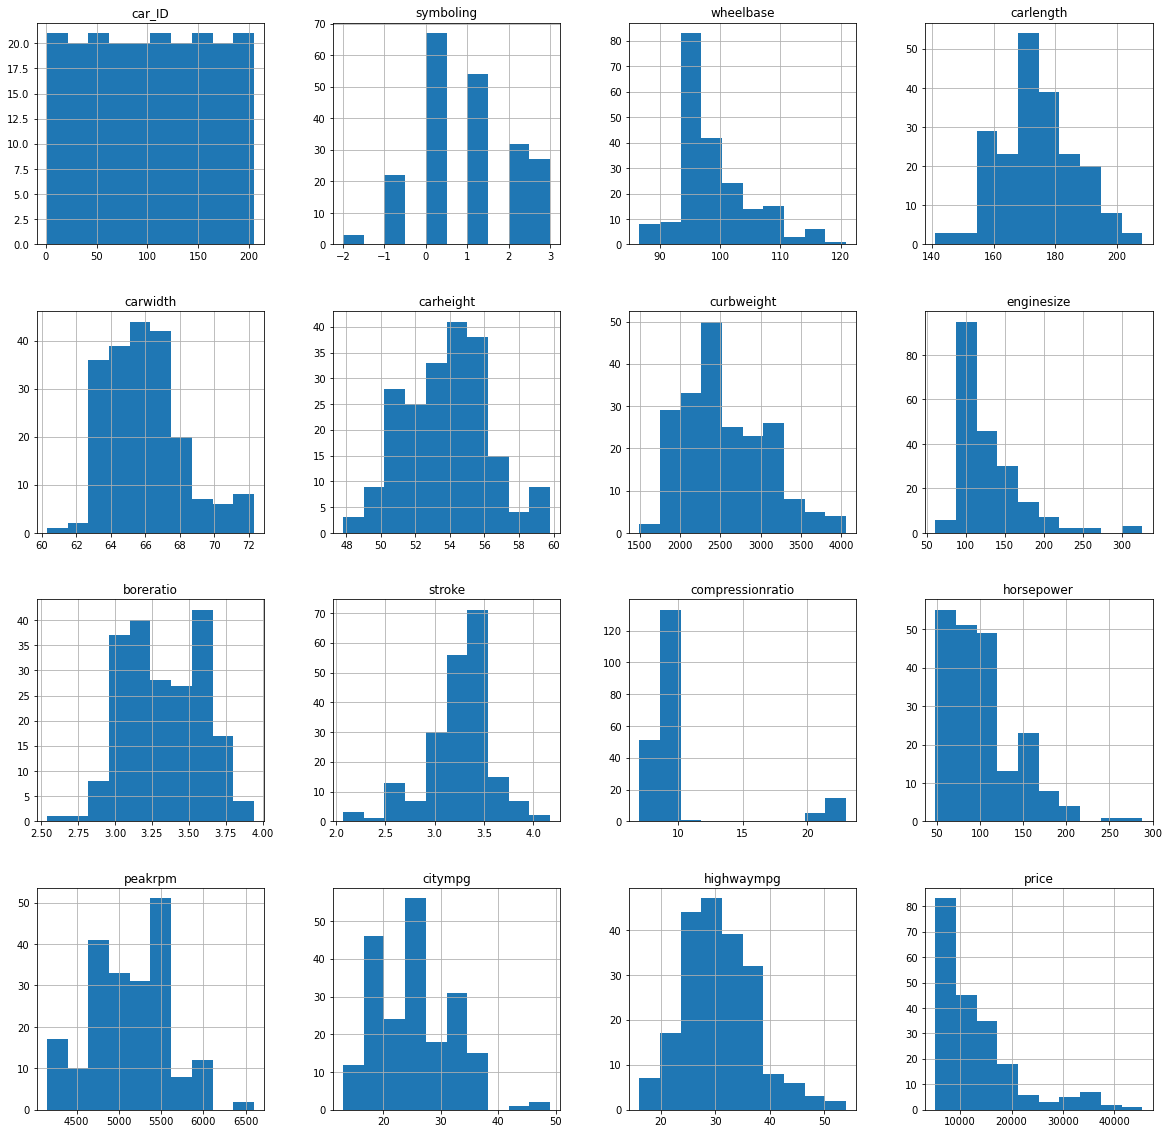

In [23]:
#Write a short description about dataset distribution. PDF
# df.describe()
#df.corr()['price']
#df.boxplot(figsize=(20,8))
#df.hist(figsize=(20,20))

In [5]:
#Sperate engine size and price features in a new Dataframe.
df_price_engine = df[['enginesize', 'price']]

In [6]:
#Calculate linear regression between engine size and price features with Gradient descent method
size_train,size_test,price_train,price_test = train_test_split(df_price_engine.enginesize,df_price_engine.price,train_size=0.8,random_state=153)
size_train_2d = size_train.to_numpy().reshape(-1, 1)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=100, tol=1e-3))
SGD.fit(size_train_2d, price_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=100))])

In [7]:
#After creating your model, test it with 20% of data
size_test_2d = size_test.to_numpy().reshape(-1, 1)
price_test_predicted = SGD.predict(size_test_2d)




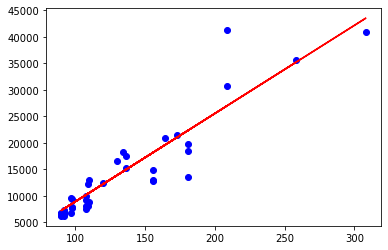

In [8]:
#Plot engine size and price features with regression line (Scatter plot).
plt.scatter(size_test,price_test,color="blue")
plt.plot(size_test,price_test_predicted,color="red",linestyle='solid')

In [9]:
#How much is this model accurate
SGD.score(size_test_2d,price_test)

0.8604936463565522

In [10]:
#Write a sample function that get engine size and returns predicted price of car
def my_predict(size: int):
    predict_price = SGD.predict(np.array([[size]]))
    return predict_price[0]
print("sample ","size",153,"price",my_predict(153))

sample  size 153 price 17707.87119966481
